In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster

In [32]:
df = pd.read_csv("Maharashtra_Combined_Dataset.csv")

In [33]:
df.head()

,last_updated_epoch,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,...,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph
0,1693000143,188.6,22.5,3.5,6.7,7.2,8.9,1,1,06:12:00,...,0.0,62,50,28.1,82.6,10.0,6,7,12.3,19.8
1,1693000202,200.3,22.4,1.3,0.5,3.7,4.5,1,1,06:21:00,...,0.0,72,82,32.5,90.5,10.0,6,6,2.2,3.6
2,1693000341,240.3,43.3,2.5,2.3,13.8,16.7,1,2,06:05:00,...,0.0,65,55,29.7,85.5,10.0,6,7,10.7,17.3
3,1693000342,180.2,30.8,0.7,0.5,2.2,3.9,1,1,06:15:00,...,0.0,55,13,28.1,82.6,10.0,6,7,10.7,17.3
4,1693000343,207.0,28.6,1.7,0.4,2.1,3.6,1,1,06:08:00,...,0.0,59,22,28.6,83.5,10.0,6,7,10.7,17.3


In [34]:
df.info

<bound method DataFrame.info of       last_updated_epoch  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0             1693000143                        188.6               22.5   
1             1693000202                        200.3               22.4   
2             1693000341                        240.3               43.3   
3             1693000342                        180.2               30.8   
4             1693000343                        207.0               28.6   
...                  ...                          ...                ...   
1408          1693023892                        347.1               35.8   
1409          1693023893                        267.0               33.6   
1410          1693023894                       2243.0                1.3   
1411          1693023895                        640.9                1.7   
1412          1693024070                        407.2               47.2   

      air_quality_Nitrogen_dioxide  air_quality_Sulphur

In [35]:
df.dtypes

last_updated_epoch                int64
air_quality_Carbon_Monoxide     float64
air_quality_Ozone               float64
air_quality_Nitrogen_dioxide    float64
air_quality_Sulphur_dioxide     float64
air_quality_PM2.5               float64
air_quality_PM10                float64
air_quality_us-epa-index          int64
air_quality_gb-defra-index        int64
sunrise                          object
sunset                           object
moonrise                         object
moonset                          object
moon_phase                       object
moon_illumination                 int64
country                          object
location_name                    object
region                           object
latitude                        float64
longitude                       float64
timezone                         object
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
wind_mph                        float64


In [36]:
sunrise_dt = pd.to_datetime(df['sunrise'], format='%H:%M:%S', errors='coerce')
sunset_dt  = pd.to_datetime(df['sunset'],  format='%H:%M:%S', errors='coerce')

In [37]:
df['total_sunlight_minutes'] = (
    sunset_dt - sunrise_dt
).dt.total_seconds() / 60

In [38]:
print(df.total_sunlight_minutes)

0       755.0
1       751.0
2       755.0
3       754.0
4       753.0
        ...  
1408    708.0
1409    708.0
1410    709.0
1411    707.0
1412    706.0
Name: total_sunlight_minutes, Length: 1413, dtype: float64


In [39]:
df.drop(columns=['sunrise','sunset','moonrise','moonset','moon_phase','moon_illumination'], inplace=True)

In [40]:
print(df.country)
print(df.location_name)

0       India
1       India
2       India
3       India
4       India
        ...  
1408    India
1409    India
1410    India
1411    India
1412    India
Name: country, Length: 1413, dtype: object
0       Aurangabad
1           Nagaon
2           Washim
3       Ahmadnagar
4            Latur
           ...    
1408         Thane
1409       Palghar
1410        Mumbai
1411        Nagpur
1412        Pendra
Name: location_name, Length: 1413, dtype: object


In [41]:
df.drop(columns=['country','location_name'],inplace=True)

In [42]:
df.dtypes

last_updated_epoch                int64
air_quality_Carbon_Monoxide     float64
air_quality_Ozone               float64
air_quality_Nitrogen_dioxide    float64
air_quality_Sulphur_dioxide     float64
air_quality_PM2.5               float64
air_quality_PM10                float64
air_quality_us-epa-index          int64
air_quality_gb-defra-index        int64
region                           object
latitude                        float64
longitude                       float64
timezone                         object
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                       int64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64


In [43]:
df.region
df.drop(columns=['region'],inplace=True)

In [44]:
df.drop(columns=['timezone','last_updated'],inplace=True)

In [45]:
print(df.wind_direction)

0       WNW
1        SW
2       WNW
3         W
4       WNW
       ... 
1408      N
1409      N
1410      N
1411      N
1412    NNW
Name: wind_direction, Length: 1413, dtype: object


In [46]:
df.dtypes

last_updated_epoch                int64
air_quality_Carbon_Monoxide     float64
air_quality_Ozone               float64
air_quality_Nitrogen_dioxide    float64
air_quality_Sulphur_dioxide     float64
air_quality_PM2.5               float64
air_quality_PM10                float64
air_quality_us-epa-index          int64
air_quality_gb-defra-index        int64
latitude                        float64
longitude                       float64
temperature_celsius             float64
temperature_fahrenheit          float64
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                       int64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64


In [47]:
drop_cols_rain = [
    'temperature_fahrenheit',
    'feels_like_celsius',
    'feels_like_fahrenheit',
]

df.drop(columns=[c for c in drop_cols_rain if c in df.columns], inplace=True)

In [48]:
df.dtypes

last_updated_epoch                int64
air_quality_Carbon_Monoxide     float64
air_quality_Ozone               float64
air_quality_Nitrogen_dioxide    float64
air_quality_Sulphur_dioxide     float64
air_quality_PM2.5               float64
air_quality_PM10                float64
air_quality_us-epa-index          int64
air_quality_gb-defra-index        int64
latitude                        float64
longitude                       float64
temperature_celsius             float64
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                       int64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
visibility_km                   float64
visibility_miles                  int64
uv_index                          int64


In [49]:
df.drop(columns=['wind_mph','wind_direction','pressure_in','precip_in','visibility_miles','gust_mph'], inplace=True)

In [114]:
df.mean()

last_updated_epoch              1.693012e+09
air_quality_Carbon_Monoxide     3.682575e+02
air_quality_Ozone               2.611868e+01
air_quality_Nitrogen_dioxide    6.133192e+00
air_quality_Sulphur_dioxide     4.633333e+00
air_quality_PM2.5               2.930446e+01
air_quality_PM10                3.823432e+01
air_quality_us-epa-index        1.895258e+00
air_quality_gb-defra-index      3.282378e+00
latitude                        1.947306e+01
longitude                       7.580885e+01
temperature_celsius             2.378719e+01
wind_kph                        1.038776e+01
wind_degree                     2.361833e+02
pressure_mb                     1.006971e+03
precip_mm                       2.289384e-01
humidity                        8.490517e+01
cloud                           5.084076e+01
visibility_km                   8.279406e+00
uv_index                        1.256900e+00
gust_kph                        1.765166e+01
total_sunlight_minutes          7.317028e+02
weather_cl

In [115]:
df.median()

last_updated_epoch              1.693012e+09
air_quality_Carbon_Monoxide     2.871000e+02
air_quality_Ozone               2.250000e+01
air_quality_Nitrogen_dioxide    4.300000e+00
air_quality_Sulphur_dioxide     1.900000e+00
air_quality_PM2.5               1.560000e+01
air_quality_PM10                1.920000e+01
air_quality_us-epa-index        2.000000e+00
air_quality_gb-defra-index      2.000000e+00
latitude                        1.968000e+01
longitude                       7.588000e+01
temperature_celsius             2.360000e+01
wind_kph                        9.400000e+00
wind_degree                     2.690000e+02
pressure_mb                     1.007000e+03
precip_mm                       0.000000e+00
humidity                        8.700000e+01
cloud                           5.100000e+01
visibility_km                   1.000000e+01
uv_index                        1.000000e+00
gust_kph                        1.660000e+01
total_sunlight_minutes          7.320000e+02
weather_cl

In [116]:
df.std()

last_updated_epoch              6952.645610
air_quality_Carbon_Monoxide      319.633602
air_quality_Ozone                 18.313572
air_quality_Nitrogen_dioxide       7.235175
air_quality_Sulphur_dioxide       10.437430
air_quality_PM2.5                 36.252336
air_quality_PM10                  45.978742
air_quality_us-epa-index           1.094830
air_quality_gb-defra-index         3.088672
latitude                           1.411456
longitude                          1.946627
temperature_celsius                2.082549
wind_kph                           5.741767
wind_degree                       99.266080
pressure_mb                        2.491602
precip_mm                          0.756284
humidity                           9.879705
cloud                             32.339352
visibility_km                      3.139551
uv_index                           1.184695
gust_kph                           8.831840
total_sunlight_minutes            13.796917
weather_cluster                 

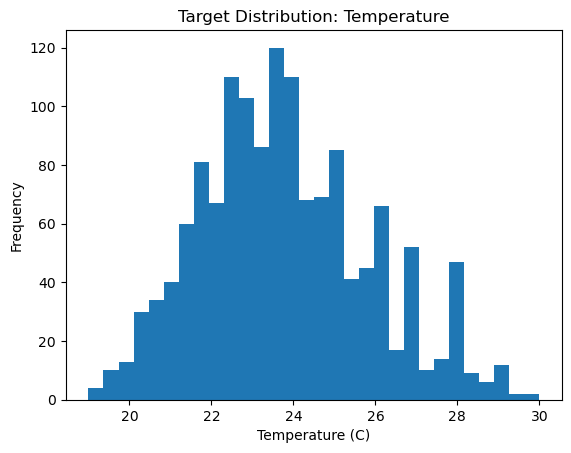

In [119]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['temperature_celsius'], bins=30)
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Target Distribution: Temperature')
plt.show()

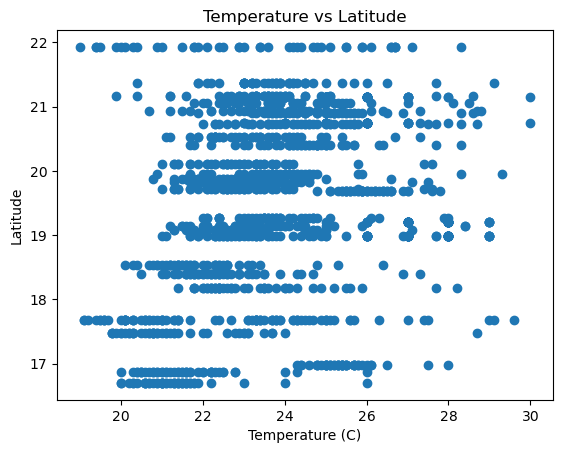

In [124]:
plt.figure()
plt.scatter(df['temperature_celsius'], df['latitude'])
plt.xlabel('Temperature (C)')
plt.ylabel('Latitude')
plt.title('Temperature vs Latitude')
plt.show()

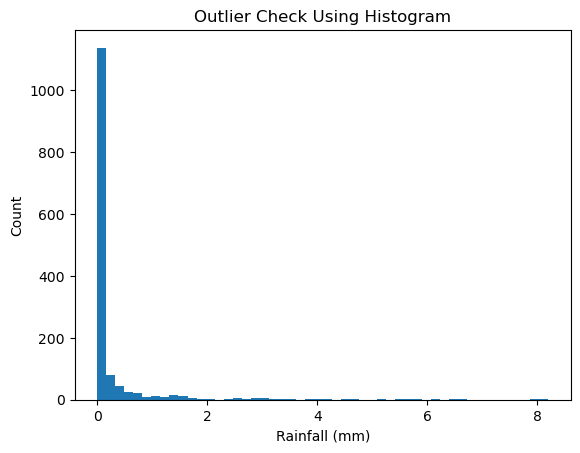

In [126]:
plt.figure()
plt.hist(df['precip_mm'], bins=50)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Count')
plt.title('Outlier Check Using Histogram')
plt.show()

In [50]:
rain_features = [
    'humidity',
    'cloud',
    'pressure_mb',
    'temperature_celsius',
    'wind_kph',
    'wind_degree',
    'gust_kph',
    'visibility_km',
    'latitude',
    'longitude',
    'total_sunlight_minutes'
]

rain_target = 'precip_mm'

df_rain = df[rain_features + [rain_target]].copy()

In [94]:
X_rain = df_rain.drop(columns=[rain_target])
y_rain = df_rain[rain_target]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_rain, y_rain, test_size=0.2, random_state=42
)

In [52]:
rain_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rain_model.fit(Xr_train, yr_train)

RandomForestRegressor(max_depth=15, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [55]:
yr_pred = rain_model.predict(Xr_test)

In [63]:
mae  = mean_absolute_error(yr_test, yr_pred)
mse  = mean_squared_error(yr_test, yr_pred)
rmse = np.sqrt(mse)
r2   = r2_score(yr_test, yr_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

MAE : 0.16604818383290332
RMSE: 0.42764601663094204
R2  : 0.6011062732771357


In [96]:
class MyRandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, random_state=42):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []

        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)

            X_sample = X.iloc[indices]
            y_sample = y.iloc[indices]

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)

            self.trees.append(tree)

    def predict(self, X):
        if len(self.trees) == 0:
            raise RuntimeError("Model not fitted yet")

        predictions = np.array([tree.predict(X) for tree in self.trees])
        return predictions.mean(axis=0)

In [97]:
my_rf = MyRandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

In [98]:
my_rf.fit(Xr_train, yr_train)

In [100]:
y_pred_my = my_rf.predict(Xr_test)

In [103]:
maer  = mean_absolute_error(yr_test, y_pred_my)
rmser = np.sqrt(mean_squared_error(yr_test, y_pred_my))
r2r   = r2_score(yr_test, y_pred_my)

print("MY RF → MAE :", maer)
print("MY RF → RMSE:", rmser)
print("MY RF → R2  :", r2r)

MY RF → MAE : 0.16288686724561152
MY RF → RMSE: 0.42370907585861484
MY RF → R2  : 0.6084169564594719


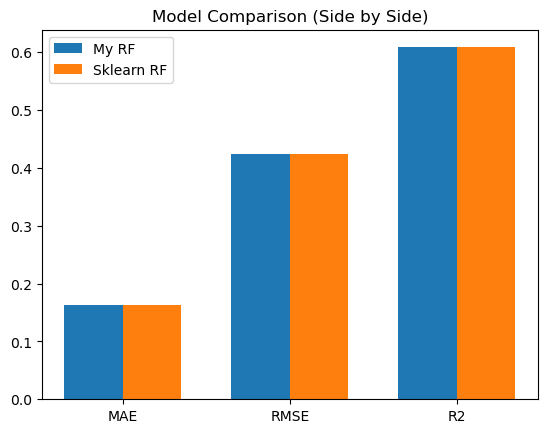

In [105]:
import matplotlib.pyplot as plt

metrics = ['MAE', 'RMSE', 'R2']

my_rf = [maer,rmser,r2r]
sk_rf = [mae,rmse,r2]

x = np.arange(len(metrics))
width = 0.35

plt.figure()
plt.bar(x - width/2, my_rf, width, label='My RF')
plt.bar(x + width/2, sk_rf, width, label='Sklearn RF')

plt.xticks(x, metrics)
plt.title('Model Comparison (Side by Side)')
plt.legend()
plt.show()

In [64]:
temp_features = [
    'humidity',
    'cloud',
    'pressure_mb',
    'wind_kph',
    'uv_index',
    'latitude',
    'total_sunlight_minutes'
]

temp_target = 'temperature_celsius'

df_temp = df[temp_features + [temp_target]].copy()

In [65]:
X_temp = df_temp.drop(columns=[temp_target])
y_temp = df_temp[temp_target]

Xt_train, Xt_test, yt_train, yt_test = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42
)

In [66]:
scaler_temp = StandardScaler()

Xt_train = scaler_temp.fit_transform(Xt_train)
Xt_test  = scaler_temp.transform(Xt_test)

In [67]:
temp_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

temp_model.fit(Xt_train, yt_train)

RandomForestRegressor(max_depth=15, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [69]:
yt_pred = temp_model.predict(Xt_test)

mae1  = mean_absolute_error(yt_test, yt_pred)
mse1  = mean_squared_error(yt_test, yt_pred)
rmse1 = np.sqrt(mse1)
r21   = r2_score(yt_test, yt_pred)

print("MAE :", mae1)
print("RMSE:", rmse1)
print("R2  :", r21)

MAE : 0.6606369264712642
RMSE: 0.9416261068149933
R2  : 0.7949587362668126


In [109]:
class MyRandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, random_state=42):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        
        np.random.seed(self.random_state)
        self.trees = []
        
        # Convert to numpy arrays to ensure consistent indexing
        self.X_ = np.array(X)
        self.y_ = np.array(y)

        n_samples = self.X_.shape[0]

        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)

            X_sample = self.X_[indices]
            y_sample = self.y_[indices]

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)

            self.trees.append(tree)

    def predict(self, X):
        if len(self.trees) == 0:
            raise RuntimeError("Model not fitted yet")
        
        X_data = np.array(X)
        predictions = np.array([tree.predict(X_data) for tree in self.trees])
        return predictions.mean(axis=0)

In [110]:
my_temp_rf = MyRandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

my_temp_rf.fit(Xt_train, yt_train)

In [112]:
print("Evaluating Temperature Model...")
yt_pred_my = my_temp_rf.predict(Xt_test)

maet  = mean_absolute_error(yt_test, yt_pred_my)
rmset = np.sqrt(mean_squared_error(yt_test, yt_pred_my))
r2t   = r2_score(yt_test, yt_pred_my)

print("MY TEMP RF → MAE :", maet)
print("MY TEMP RF → RMSE:", rmset)
print("MY TEMP RF → R2  :", r2t)

Evaluating Temperature Model...
MY TEMP RF → MAE : 0.6650275375788895
MY TEMP RF → RMSE: 0.9447074315624926
MY TEMP RF → R2  : 0.7936146094481858


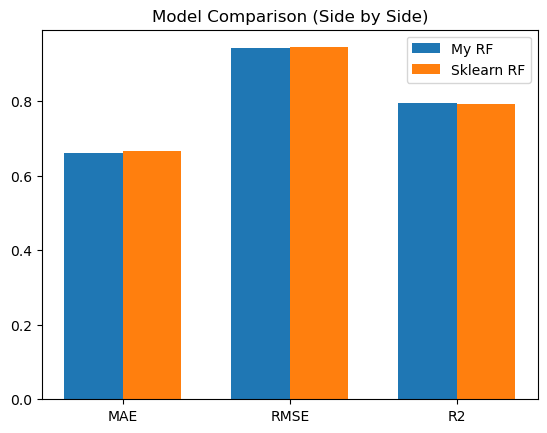

In [113]:
import matplotlib.pyplot as plt

metrics = ['MAE', 'RMSE', 'R2']

my_rf = [mae1,rmse1,r21]
sk_rf = [maet,rmset,r2t]

x = np.arange(len(metrics))
width = 0.35

plt.figure()
plt.bar(x - width/2, my_rf, width, label='My RF')
plt.bar(x + width/2, sk_rf, width, label='Sklearn RF')

plt.xticks(x, metrics)
plt.title('Model Comparison (Side by Side)')
plt.legend()
plt.show()

visibility_km             0.351779
wind_kph                  0.160304
cloud                     0.118164
gust_kph                  0.077323
latitude                  0.060395
wind_degree               0.058247
total_sunlight_minutes    0.049885
humidity                  0.045427
temperature_celsius       0.030782
longitude                 0.026137
pressure_mb               0.021557
dtype: float64


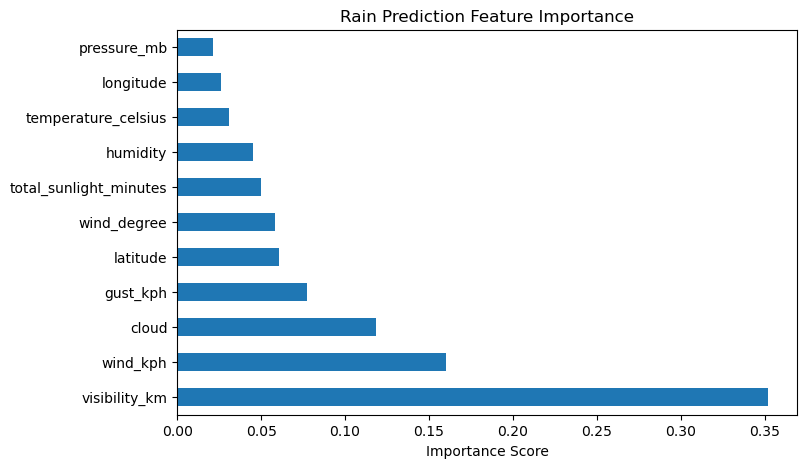

In [72]:
rain_importance = pd.Series(
    rain_model.feature_importances_,
    index=rain_features
).sort_values(ascending=False)

print(rain_importance)
rain_importance.plot(kind='barh', figsize=(8,5))
plt.title("Rain Prediction Feature Importance")
plt.xlabel("Importance Score")
plt.show()

latitude                  0.307873
humidity                  0.189534
cloud                     0.128810
uv_index                  0.120630
total_sunlight_minutes    0.110995
wind_kph                  0.105006
pressure_mb               0.037152
dtype: float64


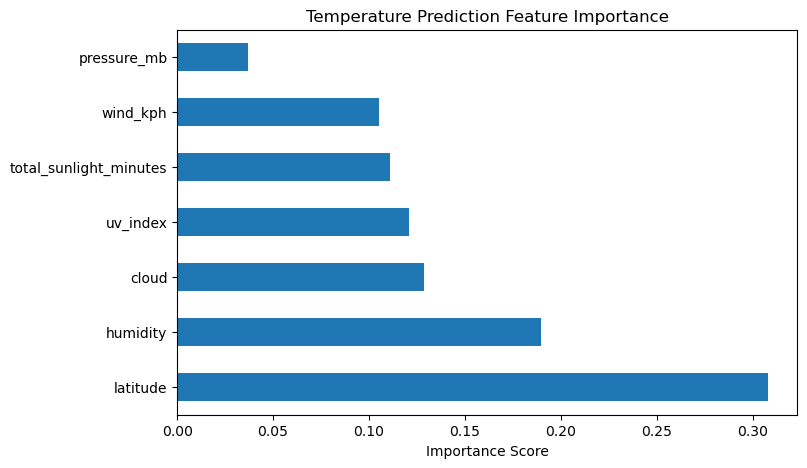

In [73]:
temp_importance = pd.Series(
    temp_model.feature_importances_,
    index=temp_features
).sort_values(ascending=False)

print(temp_importance)

temp_importance.plot(kind='barh', figsize=(8,5))
plt.title("Temperature Prediction Feature Importance")
plt.xlabel("Importance Score")
plt.show()

In [74]:
cluster_features = [
    'temperature_celsius',
    'humidity',
    'cloud',
    'pressure_mb',
    'wind_kph',
    'total_sunlight_minutes',
    'precip_mm'
]

In [76]:
X = df[cluster_features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df.loc[X.index, 'weather_cluster'] = kmeans.fit_predict(X_scaled)

In [77]:
df.groupby('weather_cluster')[cluster_features].mean()

,temperature_celsius,humidity,cloud,pressure_mb,wind_kph,total_sunlight_minutes,precip_mm
weather_cluster,,,,,,,
0.0,23.759011,88.628975,75.289753,1004.325088,17.929682,740.992933,0.812509
1.0,23.244805,91.176948,63.660714,1006.602273,8.044481,729.883117,0.141120
2.0,25.970370,74.643519,36.212963,1008.120370,10.744444,750.129630,0.030093
3.0,23.352685,75.842282,11.724832,1009.412752,7.810738,713.285235,0.000403


In [81]:
Z = linkage(X_scaled, method='ward')

df.loc[X.index, 'season_cluster'] = fcluster(Z, 4, criterion='maxclust')

print(df.groupby('season_cluster')[cluster_features].mean())

                temperature_celsius   humidity      cloud  pressure_mb  \
season_cluster                                                           
1.0                       22.617431  74.701835   7.366972  1010.022936   
2.0                       25.766412  70.114504  29.206107  1009.099237   
3.0                       23.473810  90.690476  86.119048  1005.023810   
4.0                       23.795890  88.739726  61.437378  1006.127202   

                 wind_kph  total_sunlight_minutes  precip_mm  
season_cluster                                                
1.0              8.341743              712.366972   0.001193  
2.0             10.664122              752.725191   0.005344  
3.0             16.259524              739.714286   3.867857  
4.0             10.547456              732.803327   0.156634  
